In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Markov Chain Monte Carlo

In [17]:
class metropolis(object):
    """Class to conduct Metropolis-Hastings sampling
    
    Parameters
    ----------
    
    log_posterior : func(theta, **kwargs)
        function to return log of posterior
        
    **kwargs : 
        keyword arguments to pass to function  
"""
    def __init__(self, log_posterior=None, **kwargs):
        self.log_posterior = log_posterior
        self.kwargs = kwargs
        return

In [24]:
def log_likelihood(theta, **kwargs):
    """Return log likelihood of line with variance"""
    a0 = theta[0]
    a1 = theta[1]
    sig = theta[2]
    x = kwargs['x']
    d = kwargs['data']
    m = a0 + a1 * x
    log_likelihood = ((- 0.5 * (m - d)**2 / sig**2) -
                      0.5 * np.log(2. * np.pi) -
                      np.log(sig))
    return(log_likelihood)

In [19]:
nx = 10000
x = np.random.random(nx) * 5. - 2.5
a0 = 3.
a1 = 1.5
sig = 1.
data = a0 + a1 * x + np.random.normal(size=nx) * sig
print(data)

[2.56924906 3.18295452 0.22307806 ... 4.2421129  0.34658306 5.44069655]


Text(0, 0.5, 'Data')

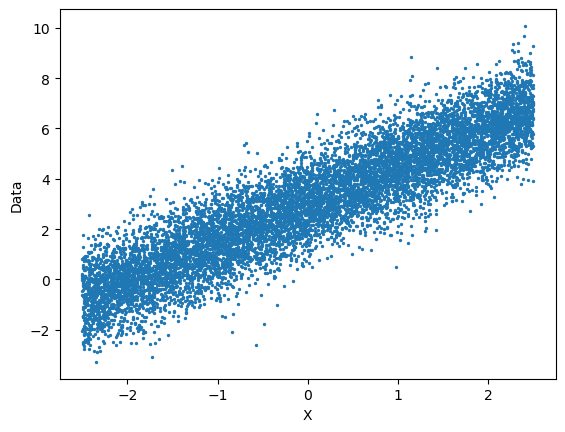

In [20]:
plt.scatter(x, data, s=2)
plt.xlabel('X')
plt.ylabel('Data')

In [21]:
met = metropolis(log_posterior=log_likelihood, data=data, x=x)

In [26]:
met.log_posterior([0., 0., 1.], data=data, x=x)

array([ -4.21945891,  -5.98453828,  -0.94382044, ...,  -9.91669946,
        -0.97899844, -15.71952801])